# ML Answers

- **Answer Set**: No. 06
- **Full Name**: Mohammad Hosein Nemati
- **Student Code**: `610300185`

---

## Basics

In this section we will done some basic steps:

### Libraries

Before begin, we must import these required libraries:

In [183]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

import sklearn.utils as skutils
import sklearn.cluster as skcluster
import sklearn.pipeline as skpipeline
import sklearn.preprocessing as skprocessing

sk.set_config(display="diagram")

### Dataset

Now we can load our dataset:

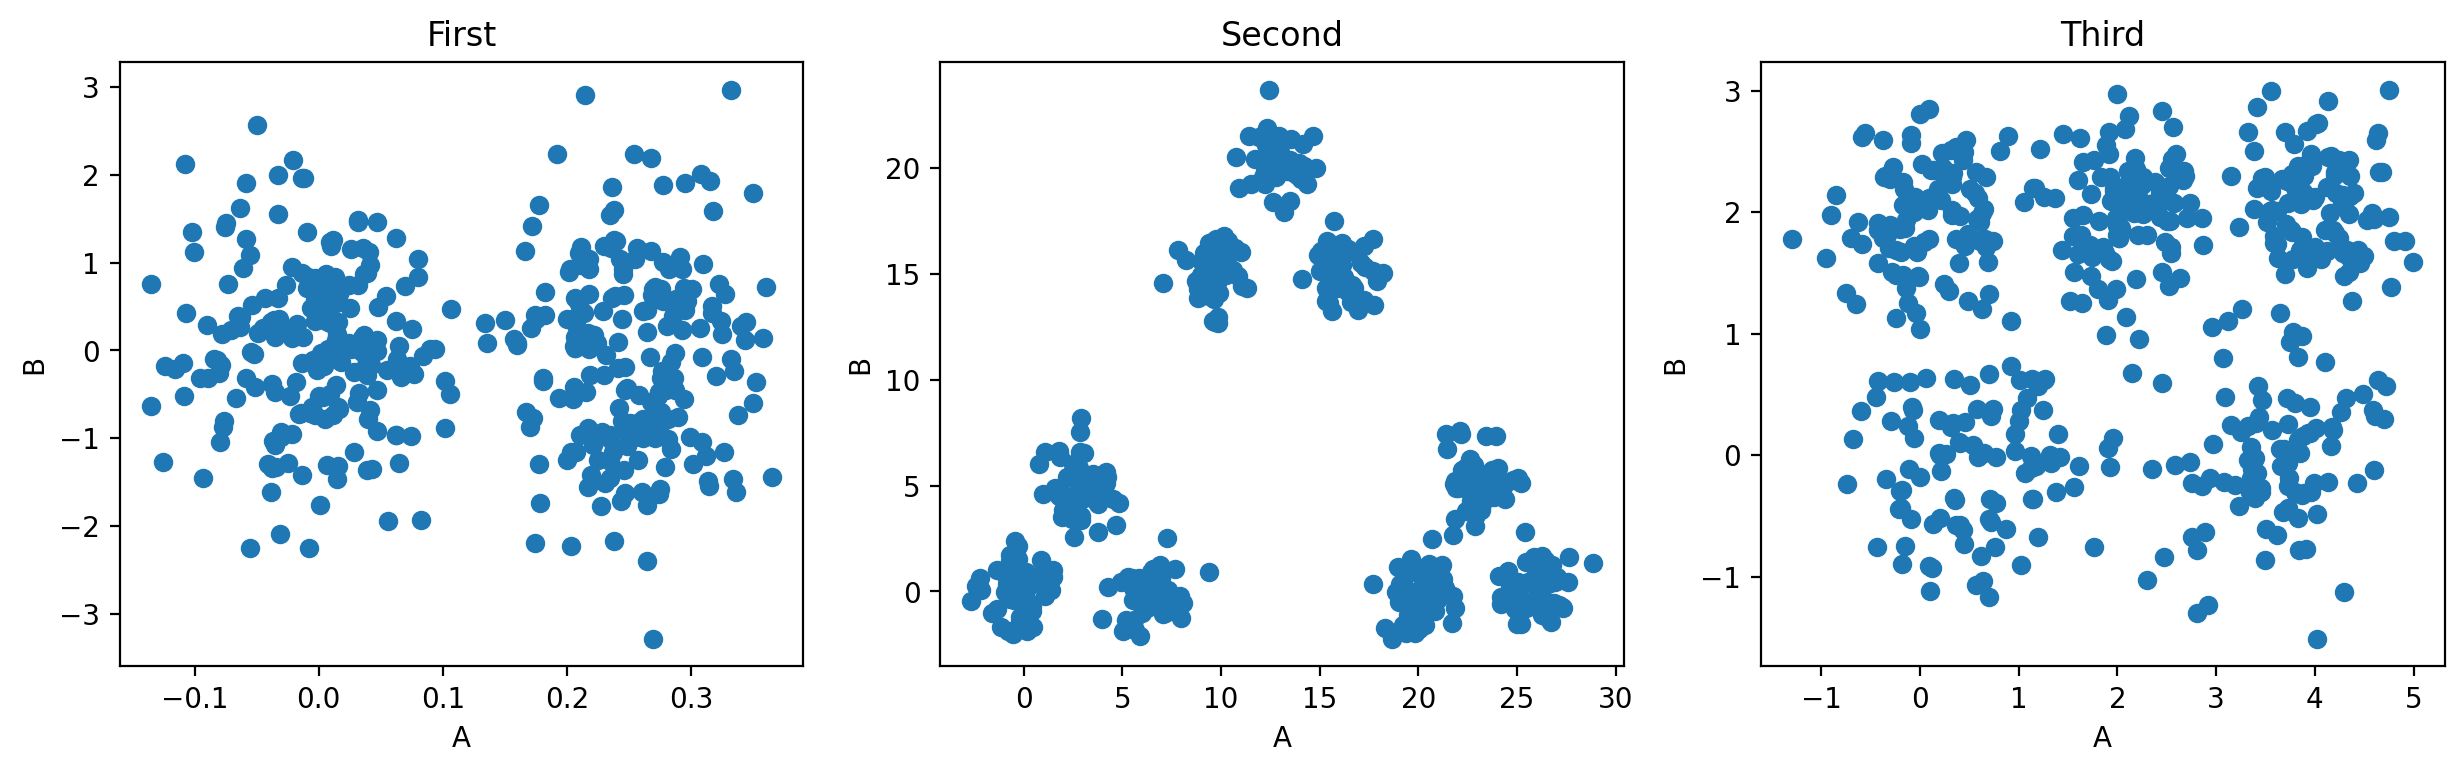

In [184]:
first_data_frame = pd.read_csv("../lib/first_clustering_dataset.csv", header=None, names=["A", "B"])
second_data_frame = pd.read_csv("../lib/second_clustering_dataset.csv", header=None, names=["A", "B"])
third_data_frame = pd.read_csv("../lib/third_clustering_dataset.csv", header=None, names=["A", "B"])

first_data_frame = skutils.shuffle(first_data_frame)
second_data_frame = skutils.shuffle(second_data_frame)
third_data_frame = skutils.shuffle(third_data_frame)

first_data_features = first_data_frame.to_numpy()
second_data_features = second_data_frame.to_numpy()
third_data_features = third_data_frame.to_numpy()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4), dpi=200)
axes = axes.flatten()

axes[0].scatter(first_data_features[:, 0], first_data_features[:, 1])
axes[0].set_title("First")
axes[0].set_xlabel("A")
axes[0].set_ylabel("B")

axes[1].scatter(second_data_features[:, 0], second_data_features[:, 1])
axes[1].set_title("Second")
axes[1].set_xlabel("A")
axes[1].set_ylabel("B")

axes[2].scatter(third_data_features[:, 0], third_data_features[:, 1])
axes[2].set_title("Third")
axes[2].set_xlabel("A")
axes[2].set_ylabel("B")

plt.show()

---

## Problem (a)

SSD Min: 37.99467865220196
SSD Mean: 38.737122911752884
SSD Standard-Deviation: 1.158888428218165


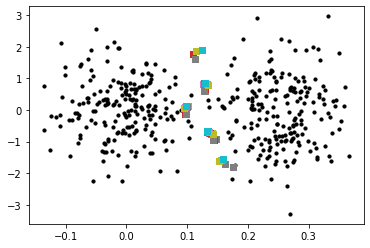

In [185]:
plt.scatter(first_data_features[:, 0], first_data_features[:, 1], s=10, color="black")
rkmeans_ssd = np.zeros(0)

for i in range(200):
    model = skcluster.KMeans(
        random_state=i,
        n_clusters=5,
        n_init=1,
        init="random"
    ).fit(first_data_features)
    rkmeans_ssd = np.append(rkmeans_ssd, model.inertia_)
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker="s")

print(f"SSD Min: {rkmeans_ssd.min()}")
print(f"SSD Mean: {rkmeans_ssd.mean()}")
print(f"SSD Standard-Deviation: {rkmeans_ssd.std()}")

plt.show()

---

## Problem (b)

SSD Min: 37.987461737795776
SSD Mean: 38.46304679856429
SSD Standard-Deviation: 0.9781865161226697


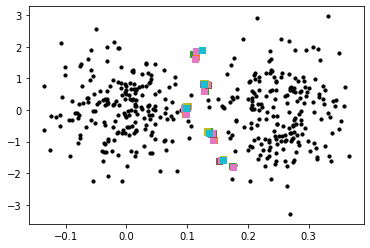

In [186]:
plt.scatter(first_data_features[:, 0], first_data_features[:, 1], s=10, color="black")
ppkmeans_ssd = np.zeros(0)

for i in range(200):
    model = skcluster.KMeans(
        random_state=i,
        n_clusters=5,
        n_init=1,
        init="k-means++"
    ).fit(first_data_features)
    ppkmeans_ssd = np.append(ppkmeans_ssd, model.inertia_)
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker="s")

print(f"SSD Min: {ppkmeans_ssd.min()}")
print(f"SSD Mean: {ppkmeans_ssd.mean()}")
print(f"SSD Standard-Deviation: {ppkmeans_ssd.std()}")

plt.show()

### Compare (a) and (b)

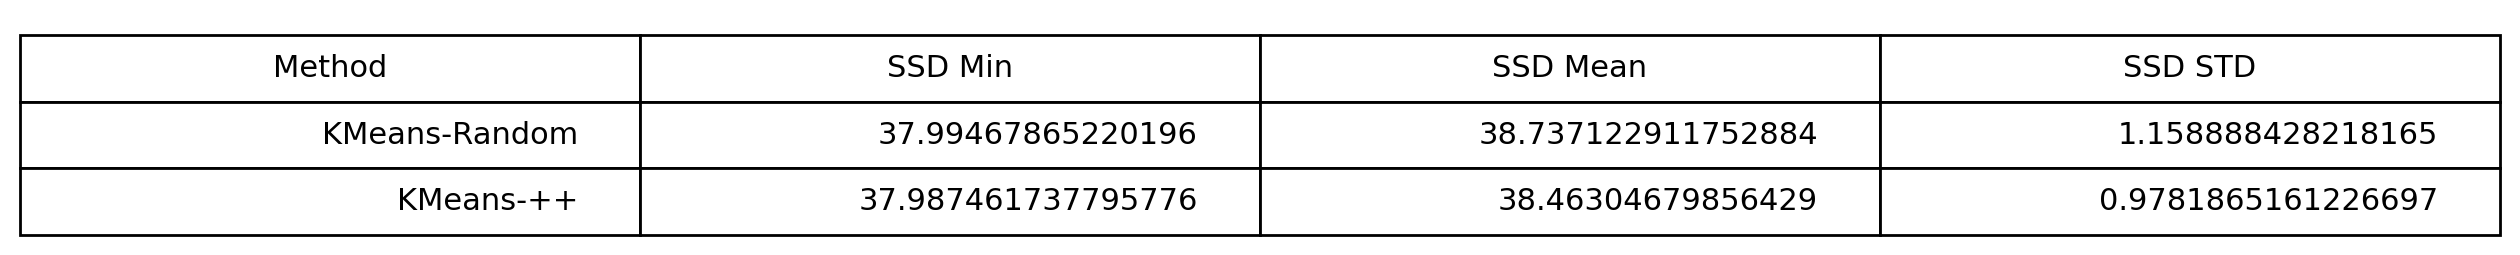

In [187]:
plt.figure(figsize=(8, 0.1), dpi=200)
table = plt.table(cellText=[
    ["KMeans-Random", rkmeans_ssd.min(), rkmeans_ssd.mean(), rkmeans_ssd.std()],
    ["KMeans-++", ppkmeans_ssd.min(), ppkmeans_ssd.mean(), ppkmeans_ssd.std()]
], colLabels=["Method", "SSD Min", "SSD Mean", "SSD STD"])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(2, 2)
plt.axis("off")
plt.show()

As we can see, the **Sum of Squared Distances** is improved in **K-Means++** and the state of cluster centroids is slightly improved.

---

## Problem (c)

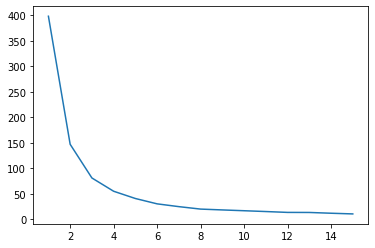

In [188]:
ssd = []

for i in range(1, 16):
    model = skcluster.KMeans(
        random_state=i,
        n_clusters=i,
        n_init=1,
        init="k-means++"
    ).fit(first_data_features)
    ssd.append(model.inertia_)

plt.plot(range(1, 16), ssd)
plt.show()

### First Knee

As we can see, the first knee is **2**:

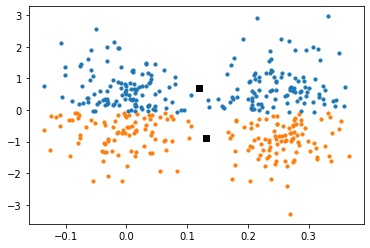

In [189]:
clusters = 2
model = skcluster.KMeans(
    random_state=1,
    n_clusters=clusters,
    n_init=200,
    init="k-means++"
).fit(first_data_features)

labels = model.predict(first_data_features)

for i in range(clusters):
    features = first_data_features[labels == i]
    plt.scatter(features[:, 0], features[:, 1], s=10)

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker="s", color="black")
plt.show()

---

## Problem (d)

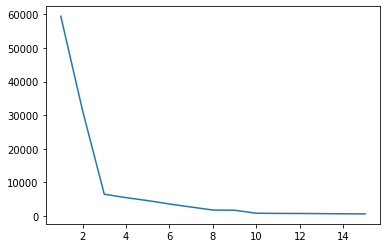

In [190]:
ssd = []

for i in range(1, 16):
    model = skcluster.KMeans(
        random_state=i,
        n_clusters=i,
        n_init=1,
        init="k-means++"
    ).fit(second_data_features)
    ssd.append(model.inertia_)

plt.plot(range(1, 16), ssd)
plt.show()

### First Knee

As we can see, the first knee is **3**:

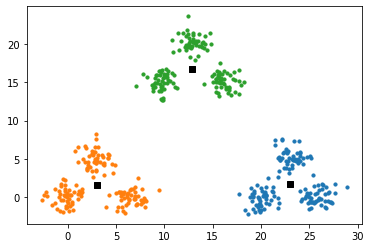

In [191]:
clusters = 3
model = skcluster.KMeans(
    random_state=1,
    n_clusters=clusters,
    n_init=200,
    init="k-means++"
).fit(second_data_features)

labels = model.predict(second_data_features)

for i in range(clusters):
    features = second_data_features[labels == i]
    plt.scatter(features[:, 0], features[:, 1], s=10)

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker="s", color="black")
plt.show()

### Second Knee

As we can see, the second knee is **9**:

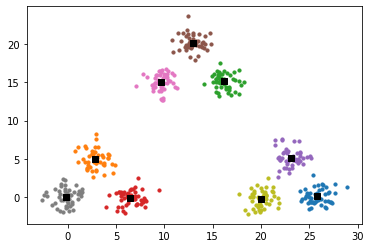

In [192]:
clusters = 9
model = skcluster.KMeans(
    random_state=1,
    n_clusters=clusters,
    n_init=200,
    init="k-means++"
).fit(second_data_features)

labels = model.predict(second_data_features)

for i in range(clusters):
    features = second_data_features[labels == i]
    plt.scatter(features[:, 0], features[:, 1], s=10)

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker="s", color="black")
plt.show()

As we can see, there are **Three Major** cluster, and each cluster has **Three Minor** clusters, so the **First Knee** occurs on the first level that we have only **Three Clusters**, and the **Second Knee** occurs on the second level that we have **Nine Clusters**.

---

## Problem (e)

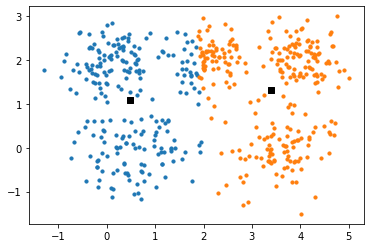

In [193]:
clusters = 2
model = skcluster.KMeans(
    random_state=1,
    n_clusters=clusters,
    n_init=500,
    init="k-means++"
).fit(third_data_features)

labels = model.predict(third_data_features)

for i in range(clusters):
    features = third_data_features[labels == i]
    plt.scatter(features[:, 0], features[:, 1], s=10)

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker="s", color="black")
plt.show()

---

## Problem (f)

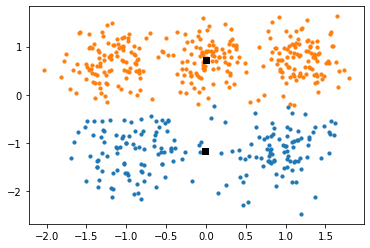

In [194]:
clusters = 2
model = skpipeline.Pipeline([
    ("scaler", skprocessing.StandardScaler()),
    ("estimator", skcluster.KMeans(
        random_state=1,
        n_clusters=clusters,
        n_init=500,
        init="k-means++"
    ))
]).fit(third_data_features)

labels = model.predict(third_data_features)

for i in range(clusters):
    features = model["scaler"].transform(third_data_features[labels == i])
    plt.scatter(features[:, 0], features[:, 1], s=10)

plt.scatter(
    model["estimator"].cluster_centers_[:, 0],
    model["estimator"].cluster_centers_[:, 1], 
    marker="s", color="black"
)
plt.show()

As we can see, after scaling the records, **Distances** between points was changed and the algorithm finds the new centroids.

---